### UNICEF LITERACY RATE

<b>Definition: </b>	Literacy rate (SDG4.6.2) – Percentage of population that can both read and write a short, simple statement about their everyday life.

<b>Unit of measure: </b>	Percentage

<b>Time frame for survey: </b>	UNESCO Institute for Statistics (UIS) data on literacy rate from past 2 years are used. For countries with multiple years of data, the most recent year was used.

<b>Data Definitions</b>

<b>ISO: </b> Three-digit alphabetical codes International Standard ISO 3166-1 assigned by the International Organization for Standardization (ISO). The latest version is available online at http://www.iso.org/iso/home/standards/country_codes.htm. (column A)

<b>Countries and areas: </b> The UNICEF Global databases contain a set of 202 countries as reported on through the State of the World's Children Statistical Annex 2017 (column B)

<b>Region, Sub-region: </b>	UNICEF regions (column C) and UNICEF Sub-regions (column D)
EAP	East Asia and the Pacific
ECA	Europe and Central Asia
EECA	Eastern Europe and Central Asia
ESA	Eastern and Southern Africa
LAC	Latin America and the Caribbean
MENA	Middle East and North Africa
NA	North America
SA	South Asia
SSA	Sub-Saharan Africa
WCA	West and Central Africa

<b>Development regions: </b> Economies are currently divided into four income groupings: low, lower-middle, upper-middle, and high. Income is measured using gross national income (GNI) per capita, in U.S. dollars, converted from local currency using the World Bank Atlas method (column E).

<b>Data Source: </b> The data source of adult and youth literacy rate is UNESCO Institute for Statistics (UIS), (column I)

<b>Time period: </b> Represents the year in which the data was collected. (column J)

Regional Aggregations
Regional aggregates for which 50% or more of the corresponding youth/adult are covered are reported.

Disclaimer
All reasonable precautions have been taken to verify the information in this database. In no event shall UNICEF be liable for damages arising from its use or interpretation


In [63]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Explanatory Data Analysis (EDA)

In [64]:
# load the dataset
df = pd.read_csv('../education_dataset/Literacy_Rate.csv')

In [65]:
# display the first 5 rows
df.head(5)

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
0,AFG,Afghanistan,SA,SA,Least Developed,56.0,74.0,65.0,30.0,55.0,43.0
1,ALB,Albania,ECA,EECA,More Developed,100.0,99.0,99.0,98.0,99.0,98.0
2,DZA,Algeria,MENA,MENA,Less Developed,97.0,98.0,97.0,75.0,87.0,81.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,NaN,NaN,NaN,NaN,NaN,NaN


#### Identifying the number of missing rows in the dataset

There are a lot of missing values in this dataset. Therefore, we need to consider to remove these missing rows or impute them with mean, median or some statical evaluation. First, we need to identify the number of missing rows in the dataset.  

In [66]:
# check for the missing values
df.isna().sum()

ISO3                            0
Countries and areas             0
Region                          2
Sub-region                      2
Development Regions             0
Youth_Literacy_Rate_Female    124
Youth_Literacy_Rate_Male      124
Youth_Literacy_Rate_Total     124
Adult_Literacy_Rate_Female    124
Adult_Literacy_Rate_Male      124
Adult_Literacy_Rate_Total     124
dtype: int64

Why there are 2 missing values in the 'Region' and 'Sub-region' columns? There were no missing value when I first checked in the Microsoft Excel. What's the problem here?

In [67]:
# check the no of rows and columns
df.shape

(202, 11)

In [68]:
df[df['Region'].isna() == True]

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
33,CAN,Canada,NaN,NaN,More Developed,NaN,NaN,NaN,NaN,NaN,NaN
193,USA,United States,NaN,NaN,More Developed,NaN,NaN,NaN,NaN,NaN,NaN


#### Caution: The Region and Sub-region code 'NA' turned into null values. Therefore, there are two missing values in these two columns. The 'NA' values turn into 'NAN'. Thus, we need to modify these values manually. Firstly, we need to identify the data types of those two columns named 'Region' and 'Sub-region'.


In [69]:
df.dtypes

ISO3                           object
Countries and areas            object
Region                         object
Sub-region                     object
Development Regions            object
Youth_Literacy_Rate_Female    float64
Youth_Literacy_Rate_Male      float64
Youth_Literacy_Rate_Total     float64
Adult_Literacy_Rate_Female    float64
Adult_Literacy_Rate_Male      float64
Adult_Literacy_Rate_Total     float64
dtype: object

Great, they are object which means they are string. It is easy to modify these string values.

In [70]:
# clone the dataframe because we are going to change something and we don't want to mess the original dataframe
df_new = df.copy()

In [71]:
# check again in the clone dataframe to make sure everything is the same as the previous
df_new.isna().sum()

ISO3                            0
Countries and areas             0
Region                          2
Sub-region                      2
Development Regions             0
Youth_Literacy_Rate_Female    124
Youth_Literacy_Rate_Male      124
Youth_Literacy_Rate_Total     124
Adult_Literacy_Rate_Female    124
Adult_Literacy_Rate_Male      124
Adult_Literacy_Rate_Total     124
dtype: int64

In [72]:
# redefine the variables
df_new.loc[33, 'Region'] = 'NA'
df_new.loc[33, 'Sub-region'] = 'NA'
df_new.loc[193,'Region'] = 'NA'
df_new.loc[193, 'Sub-region'] = 'NA'

In [73]:
# let's recheck again
df_new.isna().sum()

ISO3                            0
Countries and areas             0
Region                          0
Sub-region                      0
Development Regions             0
Youth_Literacy_Rate_Female    124
Youth_Literacy_Rate_Male      124
Youth_Literacy_Rate_Total     124
Adult_Literacy_Rate_Female    124
Adult_Literacy_Rate_Male      124
Adult_Literacy_Rate_Total     124
dtype: int64

In [74]:
# we have successfully redefined the variables
print(df_new.loc[33])
print(df_new.loc[193])

ISO3                                     CAN
Countries and areas                   Canada
Region                                    NA
Sub-region                                NA
Development Regions           More Developed
Youth_Literacy_Rate_Female               NaN
Youth_Literacy_Rate_Male                 NaN
Youth_Literacy_Rate_Total                NaN
Adult_Literacy_Rate_Female               NaN
Adult_Literacy_Rate_Male                 NaN
Adult_Literacy_Rate_Total                NaN
Name: 33, dtype: object
ISO3                                     USA
Countries and areas            United States
Region                                    NA
Sub-region                                NA
Development Regions           More Developed
Youth_Literacy_Rate_Female               NaN
Youth_Literacy_Rate_Male                 NaN
Youth_Literacy_Rate_Total                NaN
Adult_Literacy_Rate_Female               NaN
Adult_Literacy_Rate_Male                 NaN
Adult_Literacy_Rate_Total      

In [75]:
# identify the dataset
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ISO3                        202 non-null    object 
 1   Countries and areas         202 non-null    object 
 2   Region                      202 non-null    object 
 3   Sub-region                  202 non-null    object 
 4   Development Regions         202 non-null    object 
 5   Youth_Literacy_Rate_Female  78 non-null     float64
 6   Youth_Literacy_Rate_Male    78 non-null     float64
 7   Youth_Literacy_Rate_Total   78 non-null     float64
 8   Adult_Literacy_Rate_Female  78 non-null     float64
 9   Adult_Literacy_Rate_Male    78 non-null     float64
 10  Adult_Literacy_Rate_Total   78 non-null     float64
dtypes: float64(6), object(5)
memory usage: 17.5+ KB


In [76]:
# describe statistics
df_new.describe()

,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,90.307692,91.820513,90.987179,81.461538,87.128205,84.256410
std,16.986861,13.075946,15.014706,22.213657,16.115943,19.189713
min,29.000000,48.000000,38.000000,26.000000,40.000000,35.000000
25%,90.250000,90.000000,90.500000,72.000000,83.000000,77.000000
50%,99.000000,98.000000,99.000000,93.000000,95.000000,94.000000
75%,100.000000,99.000000,99.000000,96.750000,98.750000,97.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# Imputation

In order to impute the missing values, we need to identify how many missing values are there and are they missing at random? The problem is there are rows where all the data are missing as a whole. In addition, the data are not missing at random and removing them from the dataset completely will certainly introduce certain biases.

On the other hand, imputing directly as a column will introduce outliers because the dataset contains developed countries that have high literacy rate and least developed countries which have low literacy rate. If we subsitute mean / median that are calculated based on these variables to the missing values will certainly intrdouce biases to the dataset.

Therefore, I will divide the countries into different groups based on their economic status <b>('Development Regions' in the dataset)</b>. This process can reduce the amount of biases because the imputation of mean or median would take in each group. For example, a certain developed countries variable which can become the outliers will not affect to other groups. This process of dividing the dataset into different groups based on a certain characteristics and performing imputation is called <b>"Stratified Imputation"</b>.

##### Definition: Stratified imputation involves dividing the data into strata (e.g., by region, income group, or development status) and imputing missing values within each stratum separately. This approach helps account for differences in literacy rates across different groups and reduces bias.


In [77]:
# identify different economies in the dataset
print(df_new['Development Regions'].unique())

['Least Developed' 'More Developed' 'Less Developed' 'Not Classified']


In [78]:
# group the countries based on their economies
least_developed_countries = df_new[df_new['Development Regions'] == 'Least Developed'].reset_index(drop = True)
less_developed_countries = df_new[df_new['Development Regions'] == 'Less Developed'].reset_index(drop = True)
more_developed_countries = df_new[df_new['Development Regions'] == 'More Developed'].reset_index(drop = True)
unclassified_countries = df_new[df_new['Development Regions'] == 'Not Classified'].reset_index(drop = True)

In [79]:
# check the stratas
least_developed_countries.head(5)

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
0,AFG,Afghanistan,SA,SA,Least Developed,56.0,74.0,65.0,30.0,55.0,43.0
1,AGO,Angola,SSA,ESA,Least Developed,NaN,NaN,NaN,NaN,NaN,NaN
2,BGD,Bangladesh,SA,SA,Least Developed,96.0,94.0,95.0,72.0,77.0,75.0
3,BEN,Benin,SSA,WCA,Least Developed,52.0,70.0,61.0,31.0,54.0,42.0
4,BTN,Bhutan,SA,SA,Least Developed,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
less_developed_countries.head(5)

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
0,DZA,Algeria,MENA,MENA,Less Developed,97.0,98.0,97.0,75.0,87.0,81.0
1,ATG,Antigua and Barbuda,LAC,LAC,Less Developed,NaN,NaN,NaN,NaN,NaN,NaN
2,ARG,Argentina,LAC,LAC,Less Developed,100.0,99.0,100.0,99.0,99.0,99.0
3,ARM,Armenia,ECA,EECA,Less Developed,NaN,NaN,NaN,NaN,NaN,NaN
4,AZE,Azerbaijan,ECA,EECA,Less Developed,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
more_developed_countries.head(5)

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
0,ALB,Albania,ECA,EECA,More Developed,100.0,99.0,99.0,98.0,99.0,98.0
1,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,EAP,EAP,More Developed,NaN,NaN,NaN,NaN,NaN,NaN
3,AUT,Austria,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN
4,BLR,Belarus,ECA,EECA,More Developed,100.0,100.0,100.0,100.0,100.0,100.0


In [82]:
unclassified_countries.head(6)

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
0,AIA,Anguilla,LAC,LAC,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
1,VGB,British Virgin Islands,LAC,LAC,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
2,VAT,Holy See,ECA,WE,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
3,MSR,Montserrat,LAC,LAC,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
4,TKL,Tokelau,EAP,EAP,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
5,TCA,Turks and Caicos Islands,LAC,LAC,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# indentify no. of countries in each straturm
print('No. of least developed countries: ', least_developed_countries.shape[0])
print('No. of leass developed countries: ', less_developed_countries.shape[0])
print('No. of more developed countries: ', more_developed_countries.shape[0])
print('No. of unclassified countries: ', unclassified_countries.shape[0])
print("Total: ", least_developed_countries.shape[0]+less_developed_countries.shape[0]+more_developed_countries.shape[0]+unclassified_countries.shape[0])

No. of least developed countries:  47
No. of leass developed countries:  99
No. of more developed countries:  50
No. of unclassified countries:  6
Total:  202


Among the different imputation methods, I would like to choose the median value to impute the null values a.k.a "NAN". Replacing null values with mean or median of a certain column is very popular in imputation. "The technique, in this instance, replaces the null values with mean, rounded mean, or median values determined for that feature across the whole dataset (in our case, in each group). It is advised to utilize the median rather than the mean when your dataset has a significant number of outliers (Simplilearn, 2023)."

<b>Ref:</b> https://www.simplilearn.com/data-imputation-article

In [84]:
# identify the no. of missing rows in least_developed_countries data frame
least_developed_countries.isna().sum()

ISO3                           0
Countries and areas            0
Region                         0
Sub-region                     0
Development Regions            0
Youth_Literacy_Rate_Female    27
Youth_Literacy_Rate_Male      27
Youth_Literacy_Rate_Total     27
Adult_Literacy_Rate_Female    27
Adult_Literacy_Rate_Male      27
Adult_Literacy_Rate_Total     27
dtype: int64

In [85]:
# identify median for each columns in least_developed_countries data frame
least_developed_countries.median(numeric_only=True)

Youth_Literacy_Rate_Female    79.5
Youth_Literacy_Rate_Male      80.0
Youth_Literacy_Rate_Total     79.5
Adult_Literacy_Rate_Female    58.0
Adult_Literacy_Rate_Male      68.5
Adult_Literacy_Rate_Total     64.5
dtype: float64

In [86]:
# median imputation
least_developed_countries = least_developed_countries.fillna(least_developed_countries.median(numeric_only=True))

In [87]:
# check the imputation
least_developed_countries.head(5)

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
0,AFG,Afghanistan,SA,SA,Least Developed,56.0,74.0,65.0,30.0,55.0,43.0
1,AGO,Angola,SSA,ESA,Least Developed,79.5,80.0,79.5,58.0,68.5,64.5
2,BGD,Bangladesh,SA,SA,Least Developed,96.0,94.0,95.0,72.0,77.0,75.0
3,BEN,Benin,SSA,WCA,Least Developed,52.0,70.0,61.0,31.0,54.0,42.0
4,BTN,Bhutan,SA,SA,Least Developed,79.5,80.0,79.5,58.0,68.5,64.5


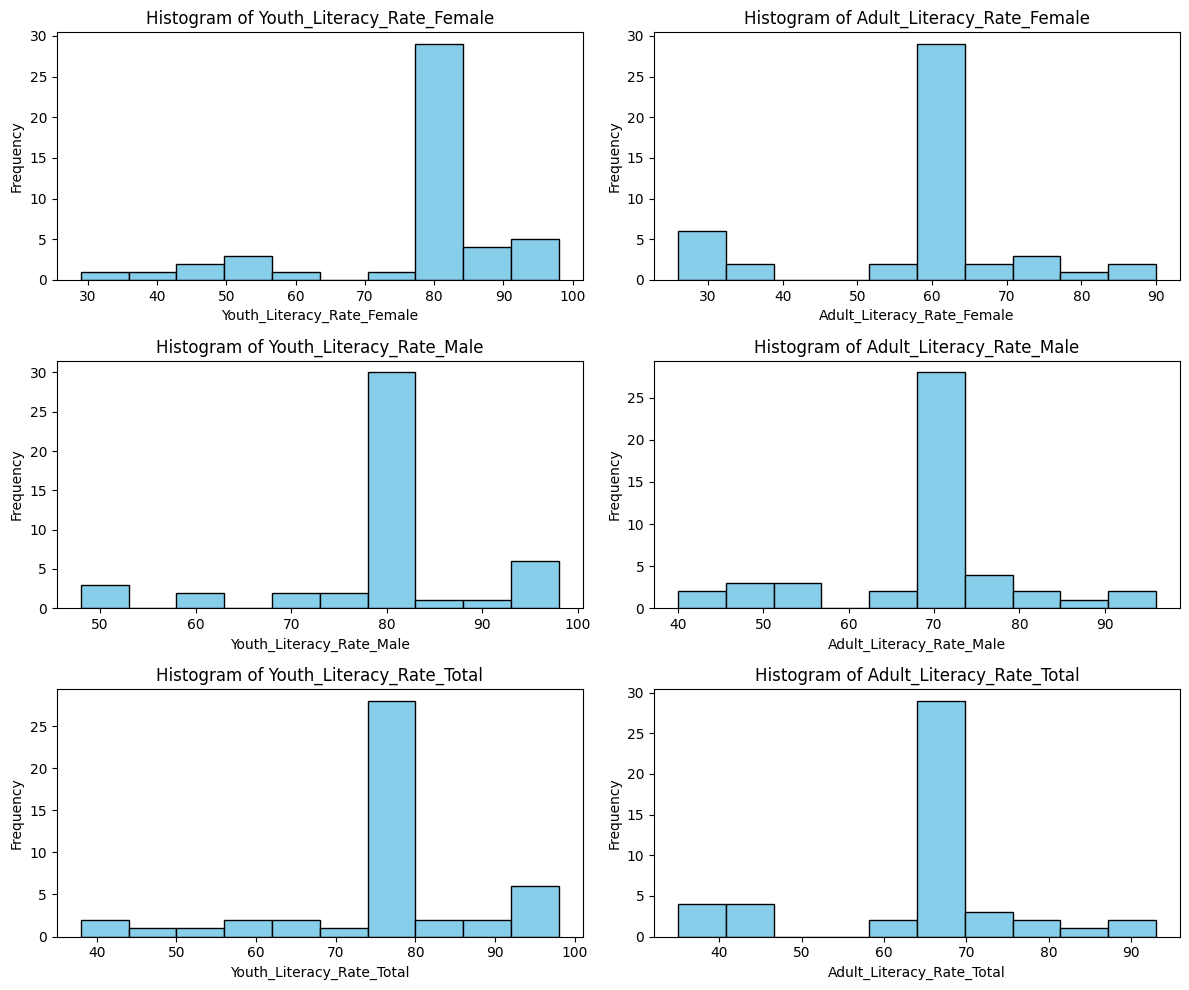

In [88]:
# plot the histogram
# define the columns for histograms
columns_to_visualize = ['Youth_Literacy_Rate_Female',
                        'Adult_Literacy_Rate_Female',
                        'Youth_Literacy_Rate_Male',
                        'Adult_Literacy_Rate_Male',
                        'Youth_Literacy_Rate_Total',
                        'Adult_Literacy_Rate_Total']

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# iterate over each column and draw the corresponding histogram
for i, column in enumerate(columns_to_visualize):

    # compute the subplot index for the current column
    row_index = i // 2  # integer division to get the row index
    col_index = i % 2   # modulus operator to get the column index

    # plot the histogram
    axes[row_index, col_index].hist(least_developed_countries[column], bins=10, color='skyblue', edgecolor='black')

    # add labels and title
    axes[row_index, col_index].set_xlabel(column)
    axes[row_index, col_index].set_ylabel('Frequency')
    axes[row_index, col_index].set_title('Histogram of ' + column)

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

In [89]:
# identify the no. of missing rows in less_developed_countries data frame
less_developed_countries.isna().sum()

ISO3                           0
Countries and areas            0
Region                         0
Sub-region                     0
Development Regions            0
Youth_Literacy_Rate_Female    53
Youth_Literacy_Rate_Male      53
Youth_Literacy_Rate_Total     53
Adult_Literacy_Rate_Female    53
Adult_Literacy_Rate_Male      53
Adult_Literacy_Rate_Total     53
dtype: int64

In [90]:
# identify median for each columns in less_developed_countries data frame
less_developed_countries.median(numeric_only=True)

Youth_Literacy_Rate_Female    99.0
Youth_Literacy_Rate_Male      99.0
Youth_Literacy_Rate_Total     99.0
Adult_Literacy_Rate_Female    94.0
Adult_Literacy_Rate_Male      96.0
Adult_Literacy_Rate_Total     95.0
dtype: float64

In [91]:
# median imputation
less_developed_countries = less_developed_countries.fillna(less_developed_countries.median(numeric_only=True))

In [92]:
# check the imputation
less_developed_countries.head(5)

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
0,DZA,Algeria,MENA,MENA,Less Developed,97.0,98.0,97.0,75.0,87.0,81.0
1,ATG,Antigua and Barbuda,LAC,LAC,Less Developed,99.0,99.0,99.0,94.0,96.0,95.0
2,ARG,Argentina,LAC,LAC,Less Developed,100.0,99.0,100.0,99.0,99.0,99.0
3,ARM,Armenia,ECA,EECA,Less Developed,99.0,99.0,99.0,94.0,96.0,95.0
4,AZE,Azerbaijan,ECA,EECA,Less Developed,99.0,99.0,99.0,94.0,96.0,95.0


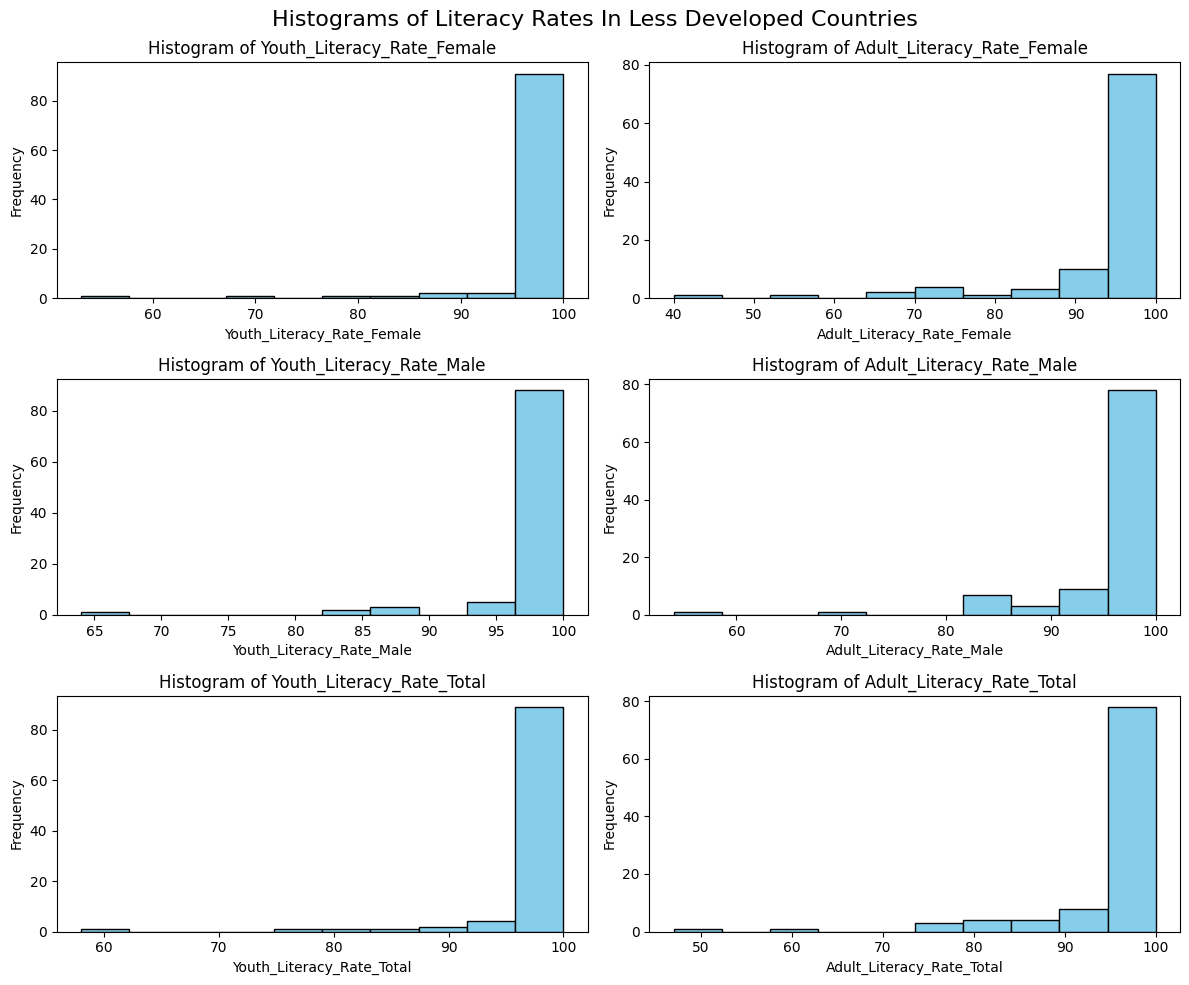

In [93]:
# plot the histogram
# define the columns for histograms
columns_to_visualize = ['Youth_Literacy_Rate_Female',
                        'Adult_Literacy_Rate_Female',
                        'Youth_Literacy_Rate_Male',
                        'Adult_Literacy_Rate_Male',
                        'Youth_Literacy_Rate_Total',
                        'Adult_Literacy_Rate_Total']

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# set the title for the entire figure
fig.suptitle('Histograms of Literacy Rates In Less Developed Countries', fontsize=16)

# iterate over each column and draw the corresponding histogram
for i, column in enumerate(columns_to_visualize):

    # compute the subplot index for the current column
    row_index = i // 2  # integer division to get the row index
    col_index = i % 2   # modulus operator to get the column index

    # plot the histogram
    axes[row_index, col_index].hist(less_developed_countries[column], bins=10, color='skyblue', edgecolor='black')

    # add labels and title
    axes[row_index, col_index].set_xlabel(column)
    axes[row_index, col_index].set_ylabel('Frequency')
    axes[row_index, col_index].set_title('Histogram of ' + column)

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

In [94]:
# identify the no. of missing rows in more_developed_countries data frame
more_developed_countries.isna().sum()

ISO3                           0
Countries and areas            0
Region                         0
Sub-region                     0
Development Regions            0
Youth_Literacy_Rate_Female    38
Youth_Literacy_Rate_Male      38
Youth_Literacy_Rate_Total     38
Adult_Literacy_Rate_Female    38
Adult_Literacy_Rate_Male      38
Adult_Literacy_Rate_Total     38
dtype: int64

In [95]:
# identify median for each columns in more_developed_countries data frame
more_developed_countries.median(numeric_only=True)

Youth_Literacy_Rate_Female    100.0
Youth_Literacy_Rate_Male      100.0
Youth_Literacy_Rate_Total     100.0
Adult_Literacy_Rate_Female     98.5
Adult_Literacy_Rate_Male       99.0
Adult_Literacy_Rate_Total      99.0
dtype: float64

In [96]:
# median imputation
more_developed_countries = more_developed_countries.fillna(more_developed_countries.median(numeric_only=True))

In [97]:
# check the imputation
more_developed_countries.head(5)

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
0,ALB,Albania,ECA,EECA,More Developed,100.0,99.0,99.0,98.0,99.0,98.0
1,AND,Andorra,ECA,WE,More Developed,100.0,100.0,100.0,98.5,99.0,99.0
2,AUS,Australia,EAP,EAP,More Developed,100.0,100.0,100.0,98.5,99.0,99.0
3,AUT,Austria,ECA,WE,More Developed,100.0,100.0,100.0,98.5,99.0,99.0
4,BLR,Belarus,ECA,EECA,More Developed,100.0,100.0,100.0,100.0,100.0,100.0


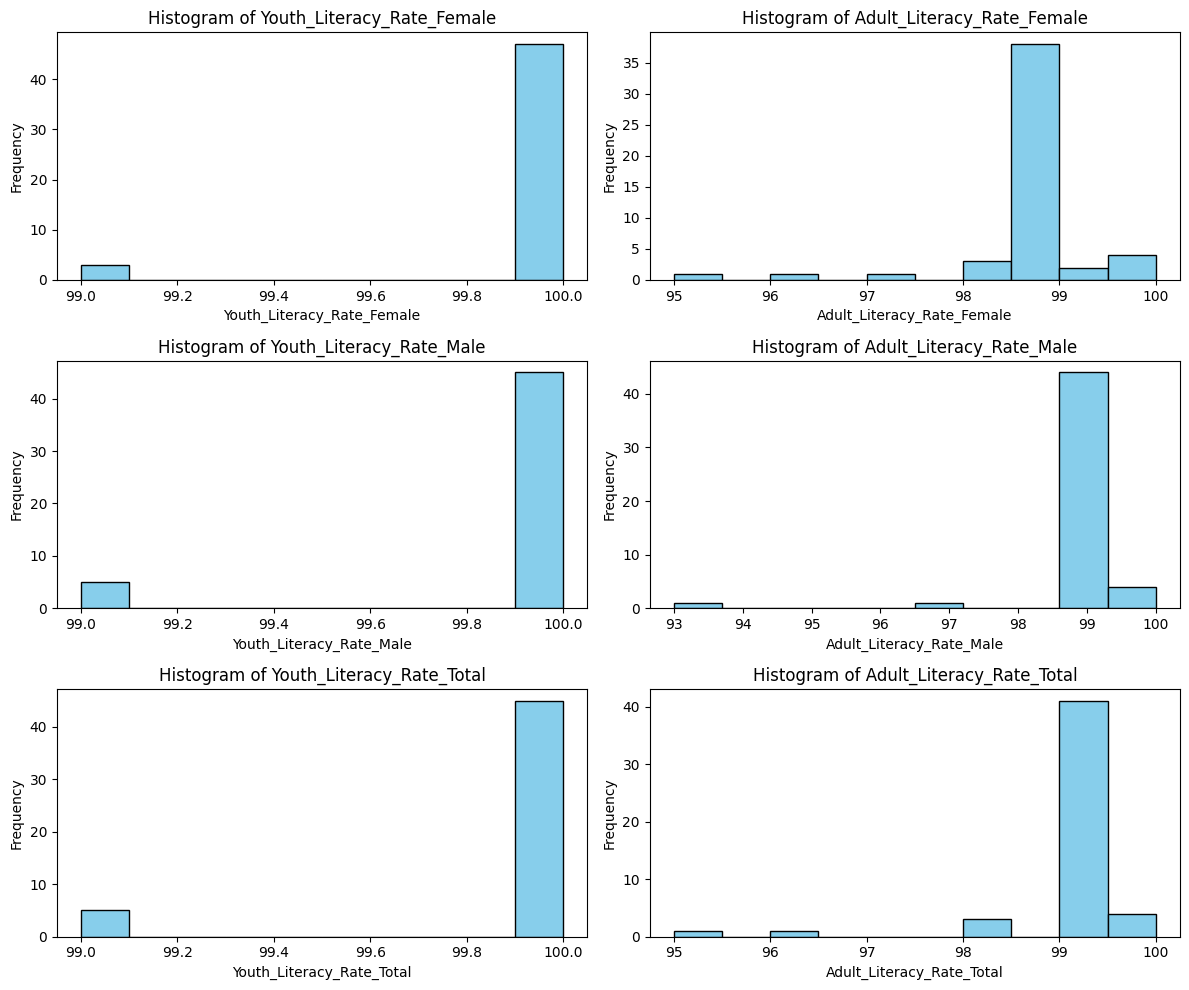

In [98]:
# plot the histogram
# define the columns for histograms
columns_to_visualize = ['Youth_Literacy_Rate_Female',
                        'Adult_Literacy_Rate_Female',
                        'Youth_Literacy_Rate_Male',
                        'Adult_Literacy_Rate_Male',
                        'Youth_Literacy_Rate_Total',
                        'Adult_Literacy_Rate_Total']

# set the title for the entire figure
fig.suptitle('Histograms of Literacy Rates In More Developed Countries', fontsize=16)

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# iterate over each column and draw the corresponding histogram
for i, column in enumerate(columns_to_visualize):

    # compute the subplot index for the current column
    row_index = i // 2  # integer division to get the row index
    col_index = i % 2   # modulus operator to get the column index

    # plot the histogram
    axes[row_index, col_index].hist(more_developed_countries[column], bins=10, color='skyblue', edgecolor='black')

    # add labels and title
    axes[row_index, col_index].set_xlabel(column)
    axes[row_index, col_index].set_ylabel('Frequency')
    axes[row_index, col_index].set_title('Histogram of ' + column)

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

In [99]:
unclassified_countries

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
0,AIA,Anguilla,LAC,LAC,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
1,VGB,British Virgin Islands,LAC,LAC,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
2,VAT,Holy See,ECA,WE,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
3,MSR,Montserrat,LAC,LAC,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
4,TKL,Tokelau,EAP,EAP,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
5,TCA,Turks and Caicos Islands,LAC,LAC,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN


Unfortunately, the countires which are not able to classified their economies do not have enough data to proceed stratified imputation.

In [100]:
# concatenate all together back to form a full dataframe
modified_df = pd.concat([least_developed_countries, less_developed_countries, more_developed_countries, unclassified_countries],
                        axis = 0,
                       ignore_index = True)

In [101]:
# show the first 5 rows
modified_df.head(5)

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
0,AFG,Afghanistan,SA,SA,Least Developed,56.0,74.0,65.0,30.0,55.0,43.0
1,AGO,Angola,SSA,ESA,Least Developed,79.5,80.0,79.5,58.0,68.5,64.5
2,BGD,Bangladesh,SA,SA,Least Developed,96.0,94.0,95.0,72.0,77.0,75.0
3,BEN,Benin,SSA,WCA,Least Developed,52.0,70.0,61.0,31.0,54.0,42.0
4,BTN,Bhutan,SA,SA,Least Developed,79.5,80.0,79.5,58.0,68.5,64.5


In [102]:
# show the last 6 rows which are empty
modified_df.tail(7)

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
195,USA,United States,NA,NA,More Developed,100.0,100.0,100.0,98.5,99.0,99.0
196,AIA,Anguilla,LAC,LAC,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
197,VGB,British Virgin Islands,LAC,LAC,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
198,VAT,Holy See,ECA,WE,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
199,MSR,Montserrat,LAC,LAC,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
200,TKL,Tokelau,EAP,EAP,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN
201,TCA,Turks and Caicos Islands,LAC,LAC,Not Classified,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# identify the datashape again
modified_df.shape

(202, 11)

In [104]:
# sort the dataframe
modified_df = modified_df.sort_values(by=['Countries and areas'], ignore_index = True )

In [105]:
visualize_df = modified_df.copy()

In [106]:
visualize_df.head(5)

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
0,AFG,Afghanistan,SA,SA,Least Developed,56.0,74.0,65.0,30.0,55.0,43.0
1,ALB,Albania,ECA,EECA,More Developed,100.0,99.0,99.0,98.0,99.0,98.0
2,DZA,Algeria,MENA,MENA,Less Developed,97.0,98.0,97.0,75.0,87.0,81.0
3,AND,Andorra,ECA,WE,More Developed,100.0,100.0,100.0,98.5,99.0,99.0
4,AGO,Angola,SSA,ESA,Least Developed,79.5,80.0,79.5,58.0,68.5,64.5


In [107]:
visualize_df.dropna(inplace=True)

In [108]:
visualize_df.isna().sum()

ISO3                          0
Countries and areas           0
Region                        0
Sub-region                    0
Development Regions           0
Youth_Literacy_Rate_Female    0
Youth_Literacy_Rate_Male      0
Youth_Literacy_Rate_Total     0
Adult_Literacy_Rate_Female    0
Adult_Literacy_Rate_Male      0
Adult_Literacy_Rate_Total     0
dtype: int64

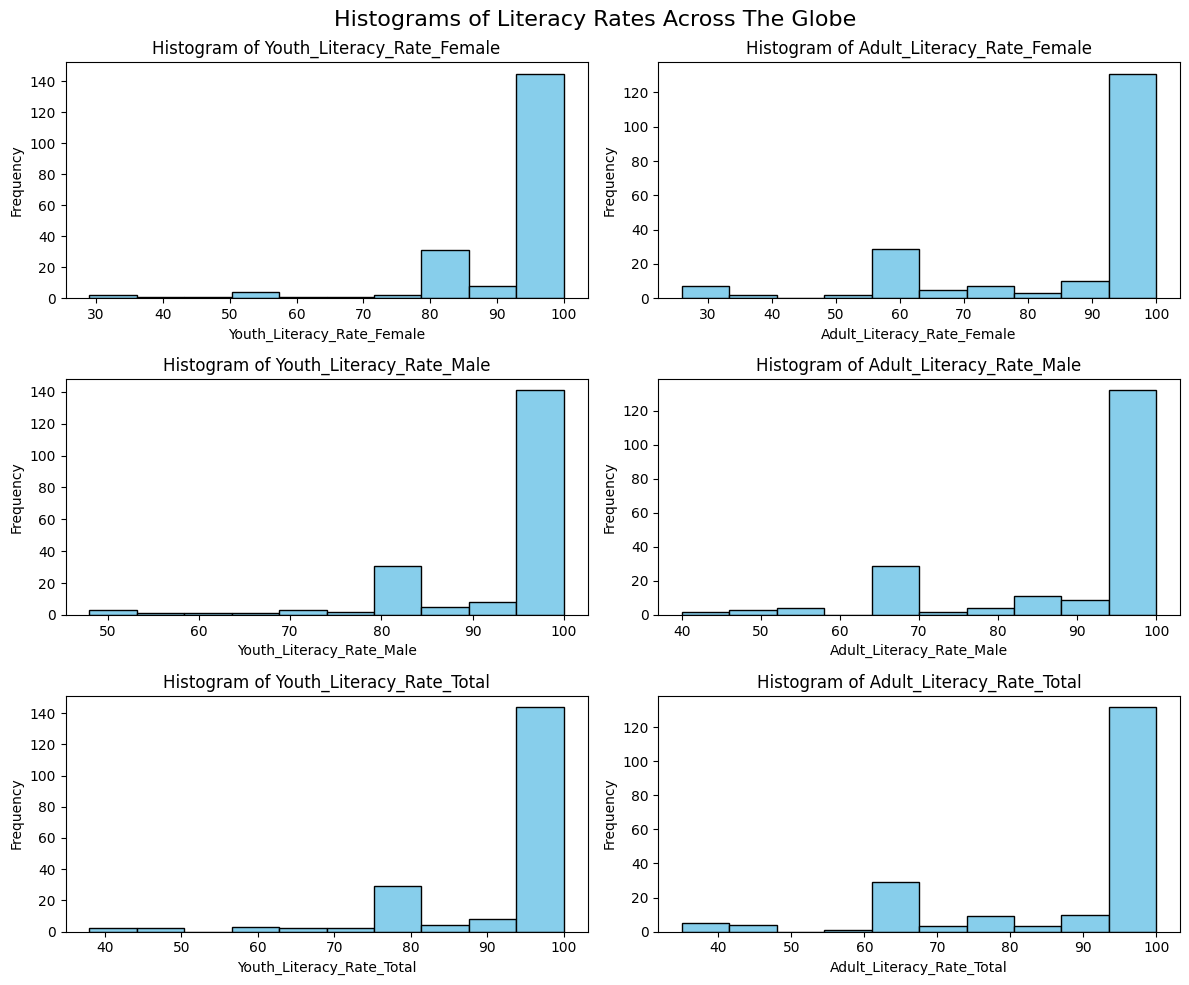

In [109]:
# define the columns for histograms
columns_to_visualize = ['Youth_Literacy_Rate_Female',
                        'Adult_Literacy_Rate_Female',
                        'Youth_Literacy_Rate_Male',
                        'Adult_Literacy_Rate_Male',
                        'Youth_Literacy_Rate_Total',
                        'Adult_Literacy_Rate_Total']

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# set the title for the entire figure
fig.suptitle('Histograms of Literacy Rates Across The Globe', fontsize=16)

# iterate over each column and draw the corresponding histogram
for i, column in enumerate(columns_to_visualize):
    # remove missing values before plotting (if necessary)
    # the previous step already cleaned out the missing values
    visualize_df_cleaned = visualize_df.dropna(subset=[column])

    # compute the subplot index for the current column
    row_index = i // 2  # integer division to get the row index
    col_index = i % 2   # modulus operator to get the column index

    # plot the histogram
    axes[row_index, col_index].hist(visualize_df_cleaned[column], bins=10, color='skyblue', edgecolor='black')

    # add labels and title
    axes[row_index, col_index].set_xlabel(column)
    axes[row_index, col_index].set_ylabel('Frequency')
    axes[row_index, col_index].set_title('Histogram of ' + column)

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

In [110]:
# idenfity the devleoping countries
developing_countries = ['Afghanistan','Albania',
                        'Algeria','Angola',
                        'Antigua and Barbuda','Argentina',
                        'Armenia','Aruba',
                        'Azerbaijan','Bahamas',
                        'Bahrain','Bangladesh',
                        'Barbados','Belarus',
                        'Belize','Benin',
                        'Bhutan','Bolivia',
                        'Bosnia and Herzegovina','Botswana',
                        'Brazil','Brunei',
                        'Bulgaria','Burkina Faso',
                        'Burundi','Cambodia',
                        'Cameroon','Cape Verde',
                        'Central African Republic','Chad',
                        'Chile','China',
                        'Colombia','Comoros',
                        'Costa Rica','Democratic Republic of the Congo',
                        'Djibouti','Dominica',
                        'Dominican Republic','East Timor',
                        'Ecuador','Egypt',
                        'El Salvador','Equatorial Guinea',
                        'Eritrea','Eswatini',
                        'Ethiopia','Federated States of Micronesia',
                        'Fiji','Gabon',
                        'Gambia','Georgia',
                        'Ghana','Grenada',
                        'Guatemala','Guinea',
                        'Guinea-Bissau','Guyana',
                        'Haiti','Honduras',
                        'India','Indonesia',
                        'Iran','Iraq',
                        'Ivory Coast','Jamaica',
                        'Jordan','Kazakhstan',
                        'Kenya','Kiribati',
                        'Kosovo','Kuwait',
                        'Kyrgyzstan','Laos',
                        'Lebanon','Lesotho',
                        'Liberia','Libya',
                        'Madagascar','Malawi',
                        'Malaysia','Maldives',
                        'Mali','Marshall Islands',
                        'Mauritania','Mauritius',
                        'Mexico','Moldova',
                        'Mongolia','Montenegro',
                        'Morocco','Mozambique',
                        'Myanmar','Namibia',
                        'Nauru','Nepal',
                        'Nicaragua','Niger',
                        'Nigeria','North Macedonia',
                        'Oman','Pakistan',
                        'Palau','Panama',
                        'Papua New Guinea','Paraguay',
                        'Peru','Philippines',
                        'Poland','Qatar',
                        'Republic of the Congo','Romania',
                        'Russia','Rwanda',
                        'Saint Kitts and Nevis','Saint Lucia',
                        'Saint Vincent and the Grenadines','Samoa',
                        'Sao Tome and Principe','Saudi Arabia',
                        'Senegal','Serbia',
                        'Seychelles','Sierra Leone',
                        'Solomon Islands','Somalia',
                        'South Africa','South Sudan',
                        'Sri Lanka','Sudan',
                        'Suriname','Syria',
                        'Tajikistan','Tanzania',
                        'Thailand','Togo',
                        'Tonga','Trinidad and Tobago',
                        'Tunisia','Turkey',
                        'Turkmenistan','Tuvalu',
                        'Uganda','Ukraine',
                        'Uruguay','Uzbekistan',
                        'Vanuatu','Venezuela',
                        'Vietnam','Yemen',
                        'Zambia','Zimbabwe']

print("No. of developing countries:", len(developing_countries))


No. of developing countries: 152


In [111]:
# segment the devleoping countries from the dataset
developing_countries = visualize_df[visualize_df['Countries and areas'].isin(developing_countries)]

In [112]:
# checked the first five rows
developing_countries.head(5)

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Youth_Literacy_Rate_Female,Youth_Literacy_Rate_Male,Youth_Literacy_Rate_Total,Adult_Literacy_Rate_Female,Adult_Literacy_Rate_Male,Adult_Literacy_Rate_Total
0,AFG,Afghanistan,SA,SA,Least Developed,56.0,74.0,65.0,30.0,55.0,43.0
1,ALB,Albania,ECA,EECA,More Developed,100.0,99.0,99.0,98.0,99.0,98.0
2,DZA,Algeria,MENA,MENA,Less Developed,97.0,98.0,97.0,75.0,87.0,81.0
4,AGO,Angola,SSA,ESA,Least Developed,79.5,80.0,79.5,58.0,68.5,64.5
6,ATG,Antigua and Barbuda,LAC,LAC,Less Developed,99.0,99.0,99.0,94.0,96.0,95.0


In [113]:
# check no. of developing countries that we have segemented from the dataframe
developing_countries.shape

(135, 11)

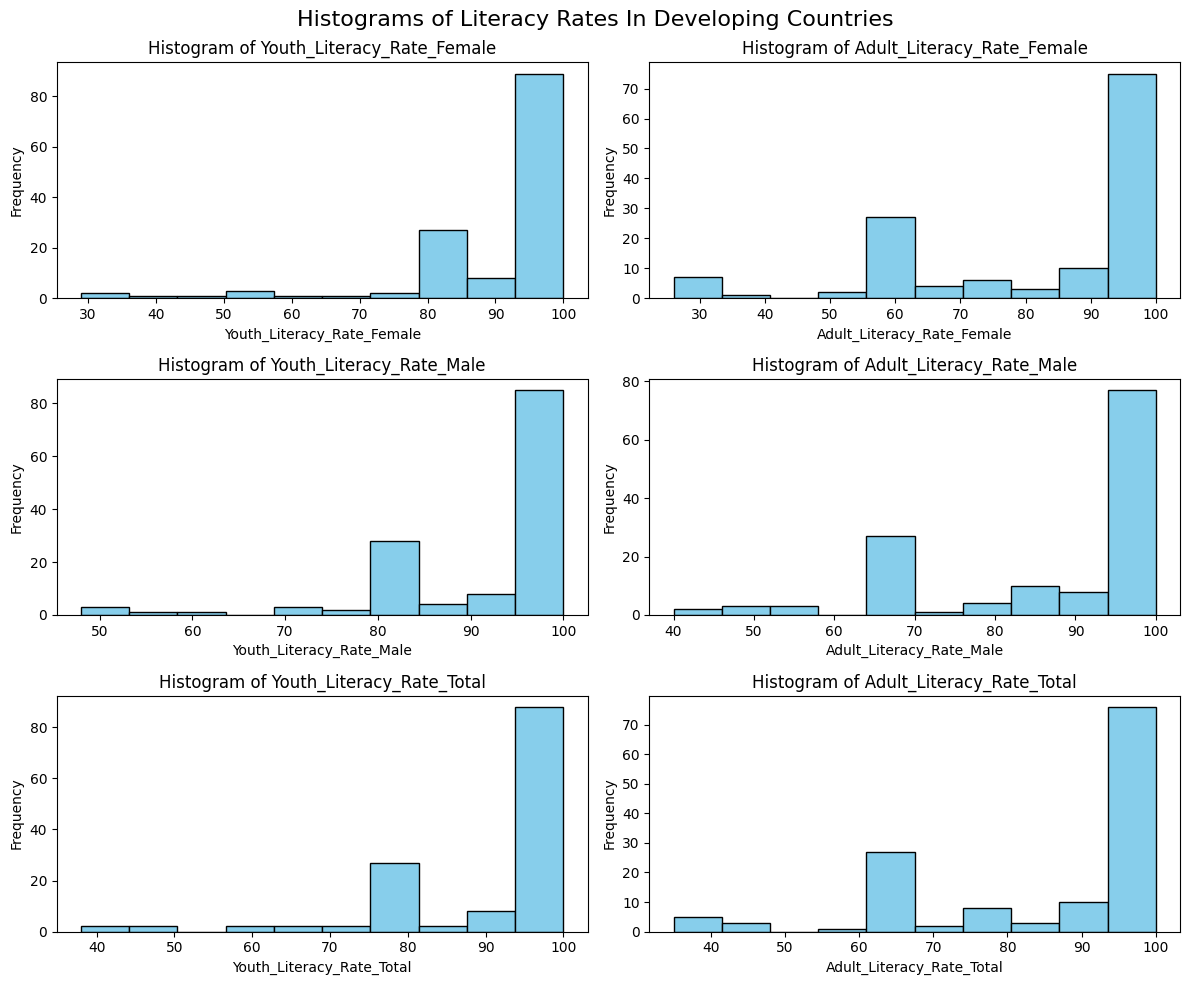

In [114]:
# visualize the distribution of literacy rate in the dataframe

# define the columns for histograms
columns_to_visualize = ['Youth_Literacy_Rate_Female',
                        'Adult_Literacy_Rate_Female',
                        'Youth_Literacy_Rate_Male',
                        'Adult_Literacy_Rate_Male',
                        'Youth_Literacy_Rate_Total',
                        'Adult_Literacy_Rate_Total']

# create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# set the title for the entire figure
fig.suptitle('Histograms of Literacy Rates In Developing Countries', fontsize=16)

# iterate over each column and draw the corresponding histogram
for i, column in enumerate(columns_to_visualize):
    # compute the subplot index for the current column
    row_index = i // 2  # integer division to get the row index
    col_index = i % 2   # modulus operator to get the column index

    # plot the histogram
    axes[row_index, col_index].hist(developing_countries[column], bins=10, color='skyblue', edgecolor='black')

    # add labels and title
    axes[row_index, col_index].set_xlabel(column)
    axes[row_index, col_index].set_ylabel('Frequency')
    axes[row_index, col_index].set_title('Histogram of ' + column)

# adjust layout
plt.tight_layout()

# show the plot
plt.show()

In [115]:
# percentage female youth literacy rate in developing countries
fig = px.choropleth(developing_countries, locations='Countries and areas', locationmode='country names',
                    color='Youth_Literacy_Rate_Female', range_color=[0, 100],
                    title='Percentage of Female Youth Literacy Rate in Developing Countries')
fig.show()

In [116]:
# percentage female adult literacy rate in developing countries
fig = px.choropleth(developing_countries, locations='Countries and areas', locationmode='country names',
                    color='Adult_Literacy_Rate_Female', range_color=[0, 100],
                    title='Percentage of Female Adult Literacy Rate in Developing Countries')
fig.show()

In [117]:
# percentage of male youth literacy rate in developing countries
fig = px.choropleth(developing_countries, locations='Countries and areas', locationmode='country names',
                   color='Youth_Literacy_Rate_Male', range_color=[0, 100],
                   title='Percentage of Male Youth Literacy Rate in Developing Countries')

fig.show()

In [118]:
# percentage of male adult literacy rate in developing countries
fig = px.choropleth(developing_countries, locations='Countries and areas', locationmode='country names',
                   color='Adult_Literacy_Rate_Male', range_color=[0, 100],
                   title='Percentage of Male Adult Literacy Rate in Developing Countries')

fig.show()

In [119]:
# percentage of total youth literacy rate in developing countries
fig = px.choropleth(developing_countries, locations='Countries and areas', locationmode='country names',
                   color='Youth_Literacy_Rate_Total', range_color=[0, 100],
                   title='Percentage of Total Youth Literacy Rate in Developing Countries')

fig.show()

In [120]:
# percentage of total adult literacy rate in developing countries
fig = px.choropleth(developing_countries, locations='Countries and areas', locationmode='country names',
                   color='Adult_Literacy_Rate_Total', range_color=[0, 100],
                   title='Percentage of Total Adult Literacy Rate in Developing Countries')

fig.show()

In [121]:
# save the dataframe
modified_df.to_csv('Literacy_Rates.csv', index = False)